#  Delivery_time -> Predict delivery time using sorting time 

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# import dataset
dataset=pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# #EDA and Data Visualization


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [14]:
dataset.shape

(21, 2)

In [5]:
dataset.dtypes # identify the datatypes of the features

dataset     object
x          float64
y          float64
dtype: object

In [6]:
dataset.shape # identify the size of of the dataset

(44, 3)

In [7]:
dataset.isnull().values.any() # checking if dataset has empty cells

False

<AxesSubplot:>

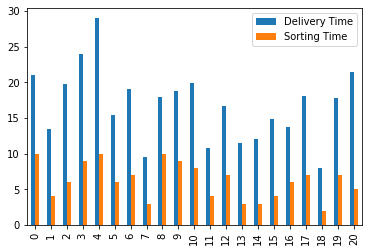

In [80]:
dataset.plot(kind='bar')

In [100]:
userspecific = dict(boxes = 'DarkGreen', whiskers = 'DarkOrange', medians = 'DarkBlue', caps = 'Gray')

<AxesSubplot:>

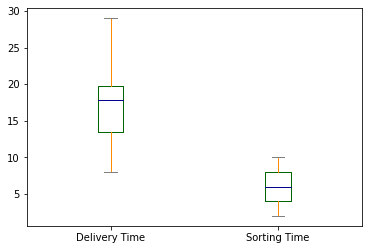

In [101]:
dataset.plot.box(color = userspecific)

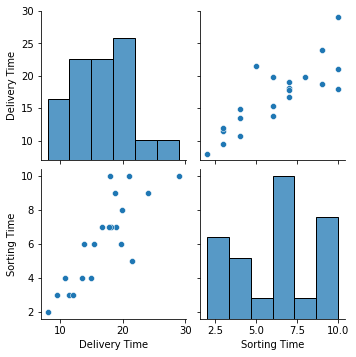

In [49]:
sns.pairplot(dataset)

<AxesSubplot:xlabel='Sorting Time', ylabel='count'>

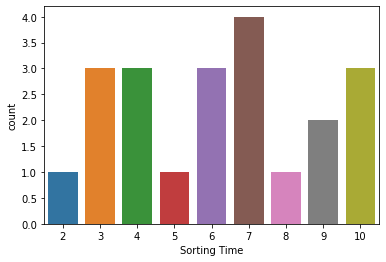

In [52]:
sns.countplot(x='Sorting Time', data=dataset)

Text(0.5, 1.0, 'Sorting Time vs Delivery Time')

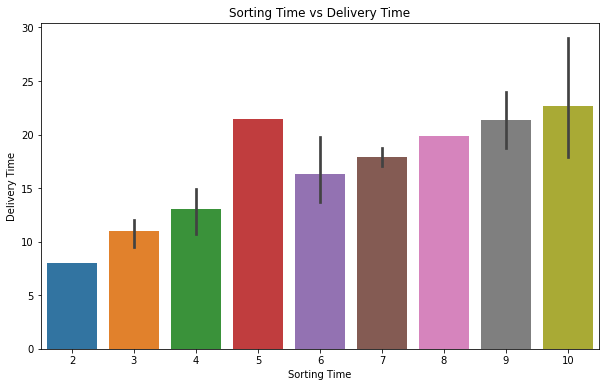

In [53]:
plt.figure(figsize = (10,6))
sns.barplot(x='Sorting Time',y='Delivery Time',data=dataset)# more cylinders= less mileage
plt.title('Sorting Time vs Delivery Time')

<AxesSubplot:ylabel='Frequency'>

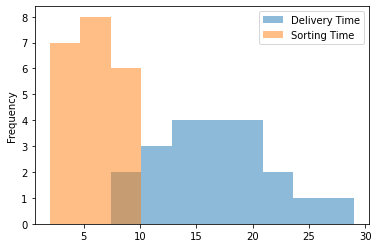

In [71]:
dataset.plot.hist(alpha = 0.5)

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

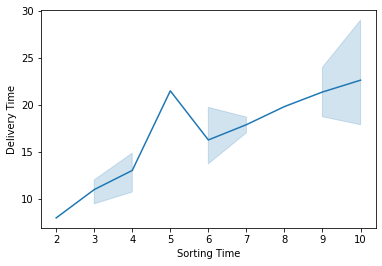

In [98]:
sns.lineplot(data=dataset, x="Sorting Time", y="Delivery Time")

<AxesSubplot:>

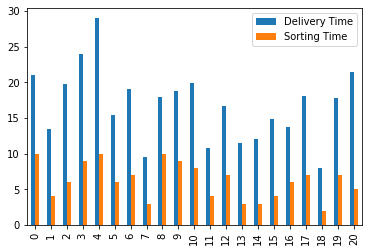

In [59]:
dataset.plot.bar(stacked = False)

([<matplotlib.patches.Wedge at 0x1f3561abd60>,
 [Text(1.0808025104656054, 0.20461166479759954, ''),
  Text(0.9682374776937783, 0.5220308293474537, ''),
  Text(0.7736658190250898, 0.7819470573333192, ''),
  Text(0.418494588963543, 1.0172818090422315, ''),
  Text(-0.09001467840978389, 1.0963107942872694, ''),
  Text(-0.5050875234813111, 0.977182988811981, ''),
  Text(-0.776030857793555, 0.7795999664906352, ''),
  Text(-0.9469842449214594, 0.5596613617809734, ''),
  Text(-1.054178522705328, 0.3141777240143109, ''),
  Text(-1.0992517943616145, -0.04056467173256675, ''),
  Text(-1.0212798332180753, -0.40864104329112677, ''),
  Text(-0.8736449687262243, -0.6683894587883284, ''),
  Text(-0.6859593401965712, -0.859918474971369, ''),
  Text(-0.4508131324671501, -1.0033780541725816, ''),
  Text(-0.2321306414305501, -1.0752280526981435, ''),
  Text(0.029838583277942872, -1.0995952250478198, ''),
  Text(0.30632618223885527, -1.0564867581162425, ''),
  Text(0.5899486697521188, -0.9284183146931698, 

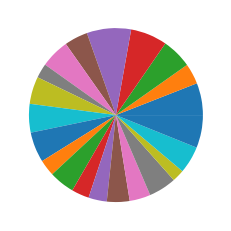

In [58]:
plt.pie(x = 'Delivery Time',data = dataset)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

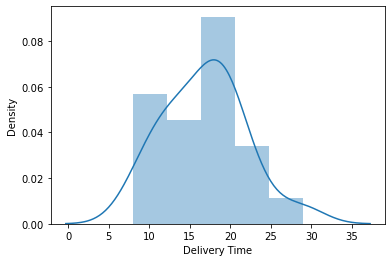

In [5]:
sns.distplot(dataset['Delivery Time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

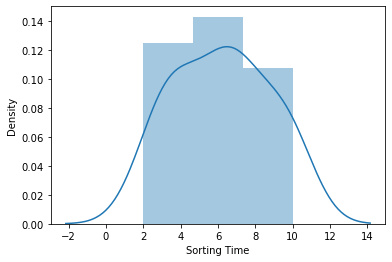

In [6]:
sns.distplot(dataset['Sorting Time'])

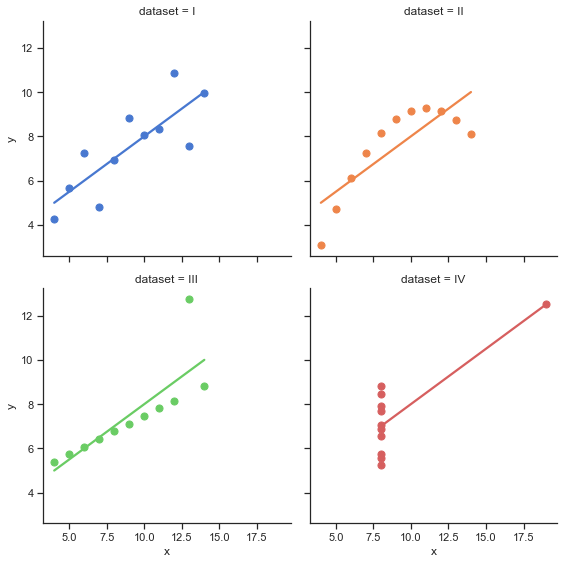

In [4]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
dataset = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=dataset,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# coloumn renaiming 

In [7]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

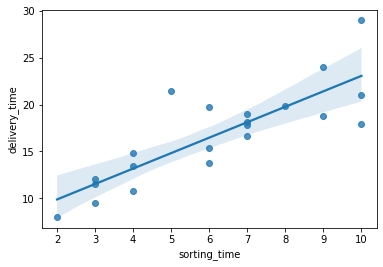

In [9]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

# Model building

In [10]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [11]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [12]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [13]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [14]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [15]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([3,8])
new_data

0    3
1    8
dtype: int64

In [16]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,3
1,8


In [17]:
model.predict(data_pred)

0    11.529794
1    19.774893
dtype: float64